In [1]:
%matplotlib widget
from IPython.display import display
import matplotlib
from matplotlib import pyplot as P
import numpy as N
from ellipses import EllipsisStack

# matplotlib.rc('axes', edgecolor='w')
matplotlib.rcParams['font.family'] = ['monospace']

(299, 673, 3)


EllipsisStack(children=(VBox(children=(IntSlider(value=15, description='n', max=50, min=5), FloatSlider(value=…

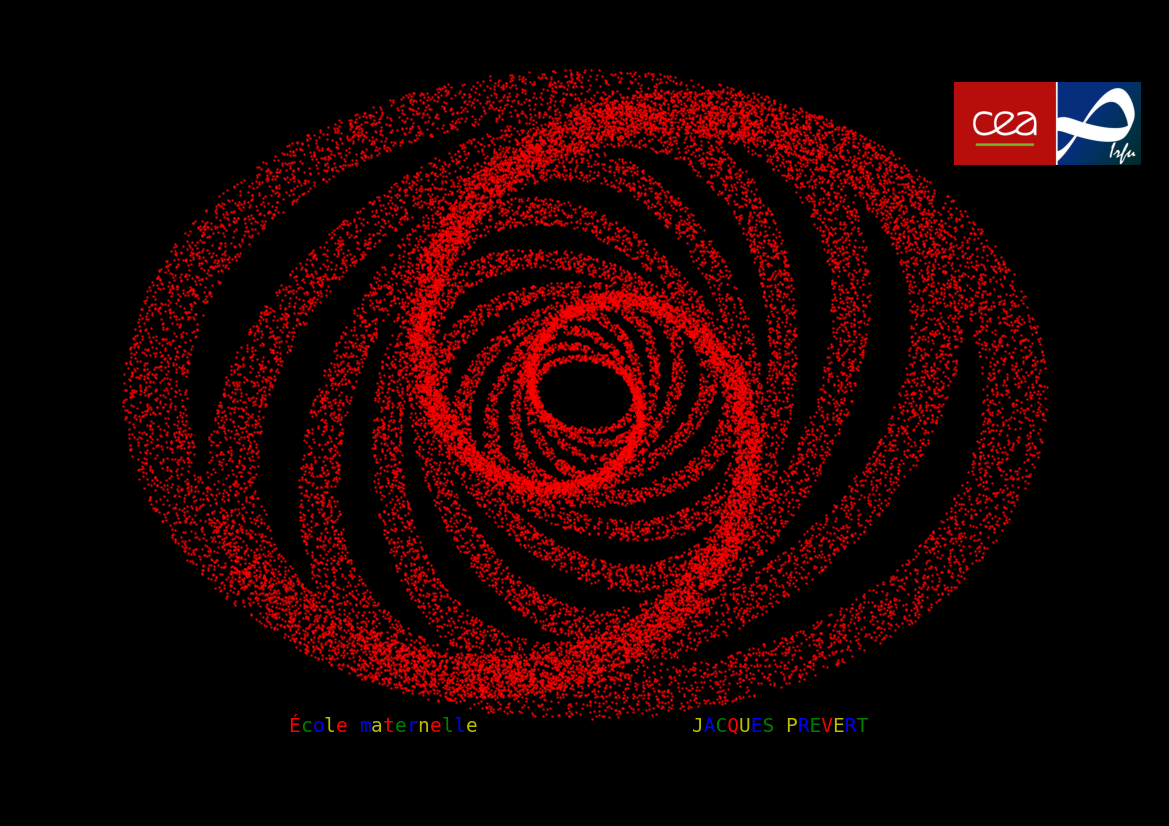

In [2]:
estack = EllipsisStack(rotate_text=False)
# plot = estack.children[-1]
# plot.layout.height = '600px'
display(estack)

/home/dchapon/Work/Fabrique_ta_galaxie/ellipses.py:170: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  P.subplots_adjust(0.03, 0.05, 0.98, 0.97)


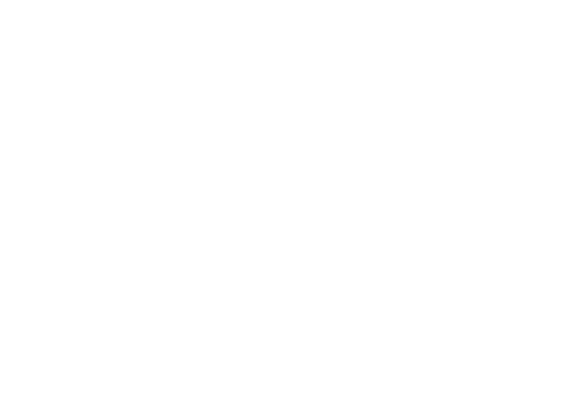

In [3]:
estack.save_figures()

Text(0.5, 1.0, 'Nombre total de grains dans un bac à sable')

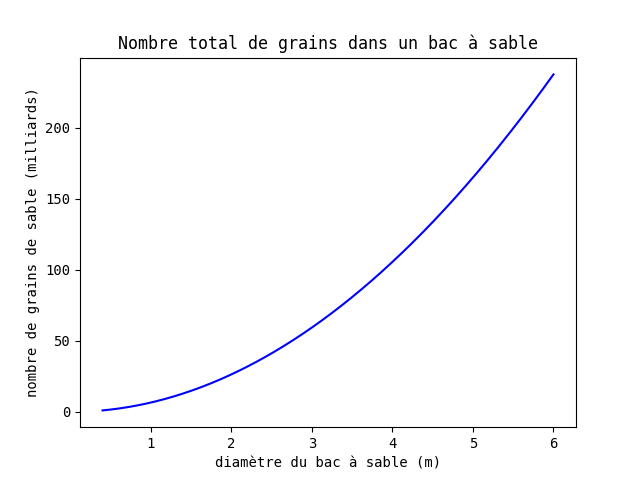

In [4]:
##############################################################
# Combien y a-t-il de grains de sables dans un bac à sable ? #
##############################################################
rho_sable_sec = 1400.0 # kg/m^3
m_grain = 50.0e-9 # kg (=> 55 microgrammes)
r_bac_a_sable = N.linspace(0.2, 3.0, 1000)  # m
profondeur = 0.3 # 30 cm
volume = N.pi*r_bac_a_sable**2* profondeur
masse = rho_sable_sec * volume
ngrains = masse / m_grain / 1.0e9 # en milliards
P.figure()
P.plot(2.0*r_bac_a_sable, ngrains, 'b-')
P.xlabel("diamètre du bac à sable (m)")
P.ylabel("nombre de grains de sable (milliards)")
P.title("Nombre total de grains dans un bac à sable")